<div style="text-align: center; color:aquamarine">
  <h2>IoT Sensor State Prediction</h2>
</div>

**Objective:** The objective of this notebook is to use key machine learning
packages such as pandas, scikit-learn, and matplotlib. It aims to enhance the ability to
analyze correlations between features, evaluate performance metrics, and introduce
various classification algorithms and their applications.

**Description:** In this notebook, we are provided with IoT (Internet of Things) sensor
data containing six features and one target variable. This is a binary classification problem,
where the objective is to predict whether the sensor is in a normal state (class 0) or an
anomalous state (class 1). It’s a synthetic/toy dataset.

<div style="text-align: center; color:aquamarine">
  <h2>Importing the Libraries</h2>
</div>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

<div style="text-align: center; color:aquamarine">
  <h2>Loading Dataset</h2>
</div>

In [44]:
df = pd.read_csv("iot_dataset-1.csv")
df.head()

,x1,x2,x3,x4,x5,x6,y
0,34.40,-16.400,2600.0,26.7,2.92,1950.0,0.0
1,30.40,1.140,1770.0,30.2,1.91,1030.0,1.0
2,19.90,-4.050,2430.0,29.9,2.25,1670.0,0.0
3,30.70,0.231,2330.0,25.6,2.29,1580.0,1.0
4,3.73,12.600,372.0,48.5,0.28,1040.0,0.0


<div style="text-align: center; color:aquamarine">
  <h2>Exploratory Data Analysis</h2>
</div>

In [45]:
df.columns = [
    "temperature",
    "humidity",
    "light",
    "noise",
    "motion",
    "device_id",
    "class",
]
df.head()

,temperature,humidity,light,noise,motion,device_id,class
0,34.40,-16.400,2600.0,26.7,2.92,1950.0,0.0
1,30.40,1.140,1770.0,30.2,1.91,1030.0,1.0
2,19.90,-4.050,2430.0,29.9,2.25,1670.0,0.0
3,30.70,0.231,2330.0,25.6,2.29,1580.0,1.0
4,3.73,12.600,372.0,48.5,0.28,1040.0,0.0


In [46]:
df["class"].value_counts()

class
0.0    1000
1.0     999
Name: count, dtype: int64

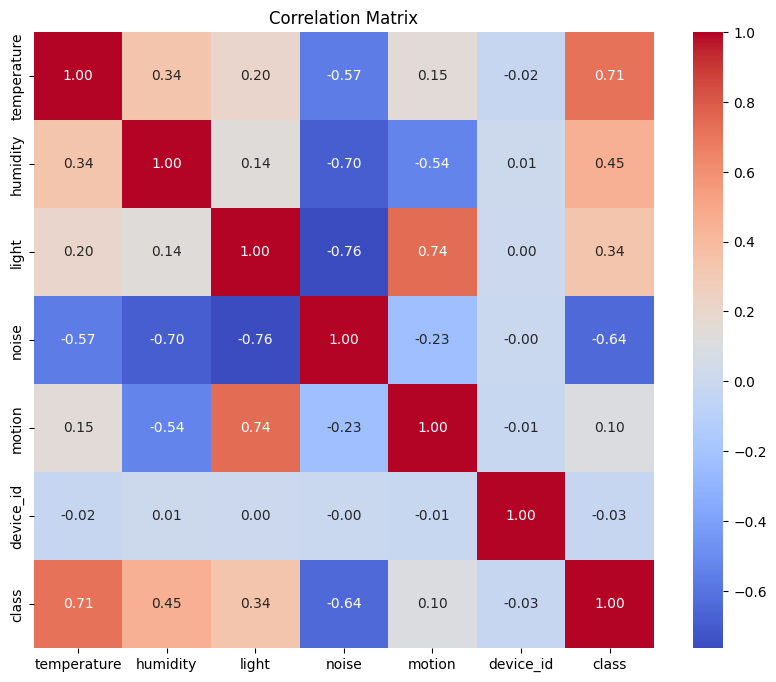

In [47]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [48]:
# Separating features and target
X = df.drop("class", axis=1)
y = df["class"]

# Applying scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled = pd.concat([X_scaled_df, y], axis=1)

# Print the first five rows of the scaled features
df_scaled.head()

,temperature,humidity,light,noise,motion,device_id,class
0,1.031508,-0.928271,1.403794,-0.690312,2.014214,1.576464,0.0
1,0.735717,-0.402084,0.799490,-0.499532,1.085802,-1.618401,1.0
2,-0.040735,-0.557780,1.280021,-0.515885,1.398337,0.604114,0.0
3,0.757901,-0.429353,1.207214,-0.750271,1.435106,0.291573,1.0
4,-1.236470,-0.058292,-0.218362,0.497971,-0.412526,-1.583674,0.0


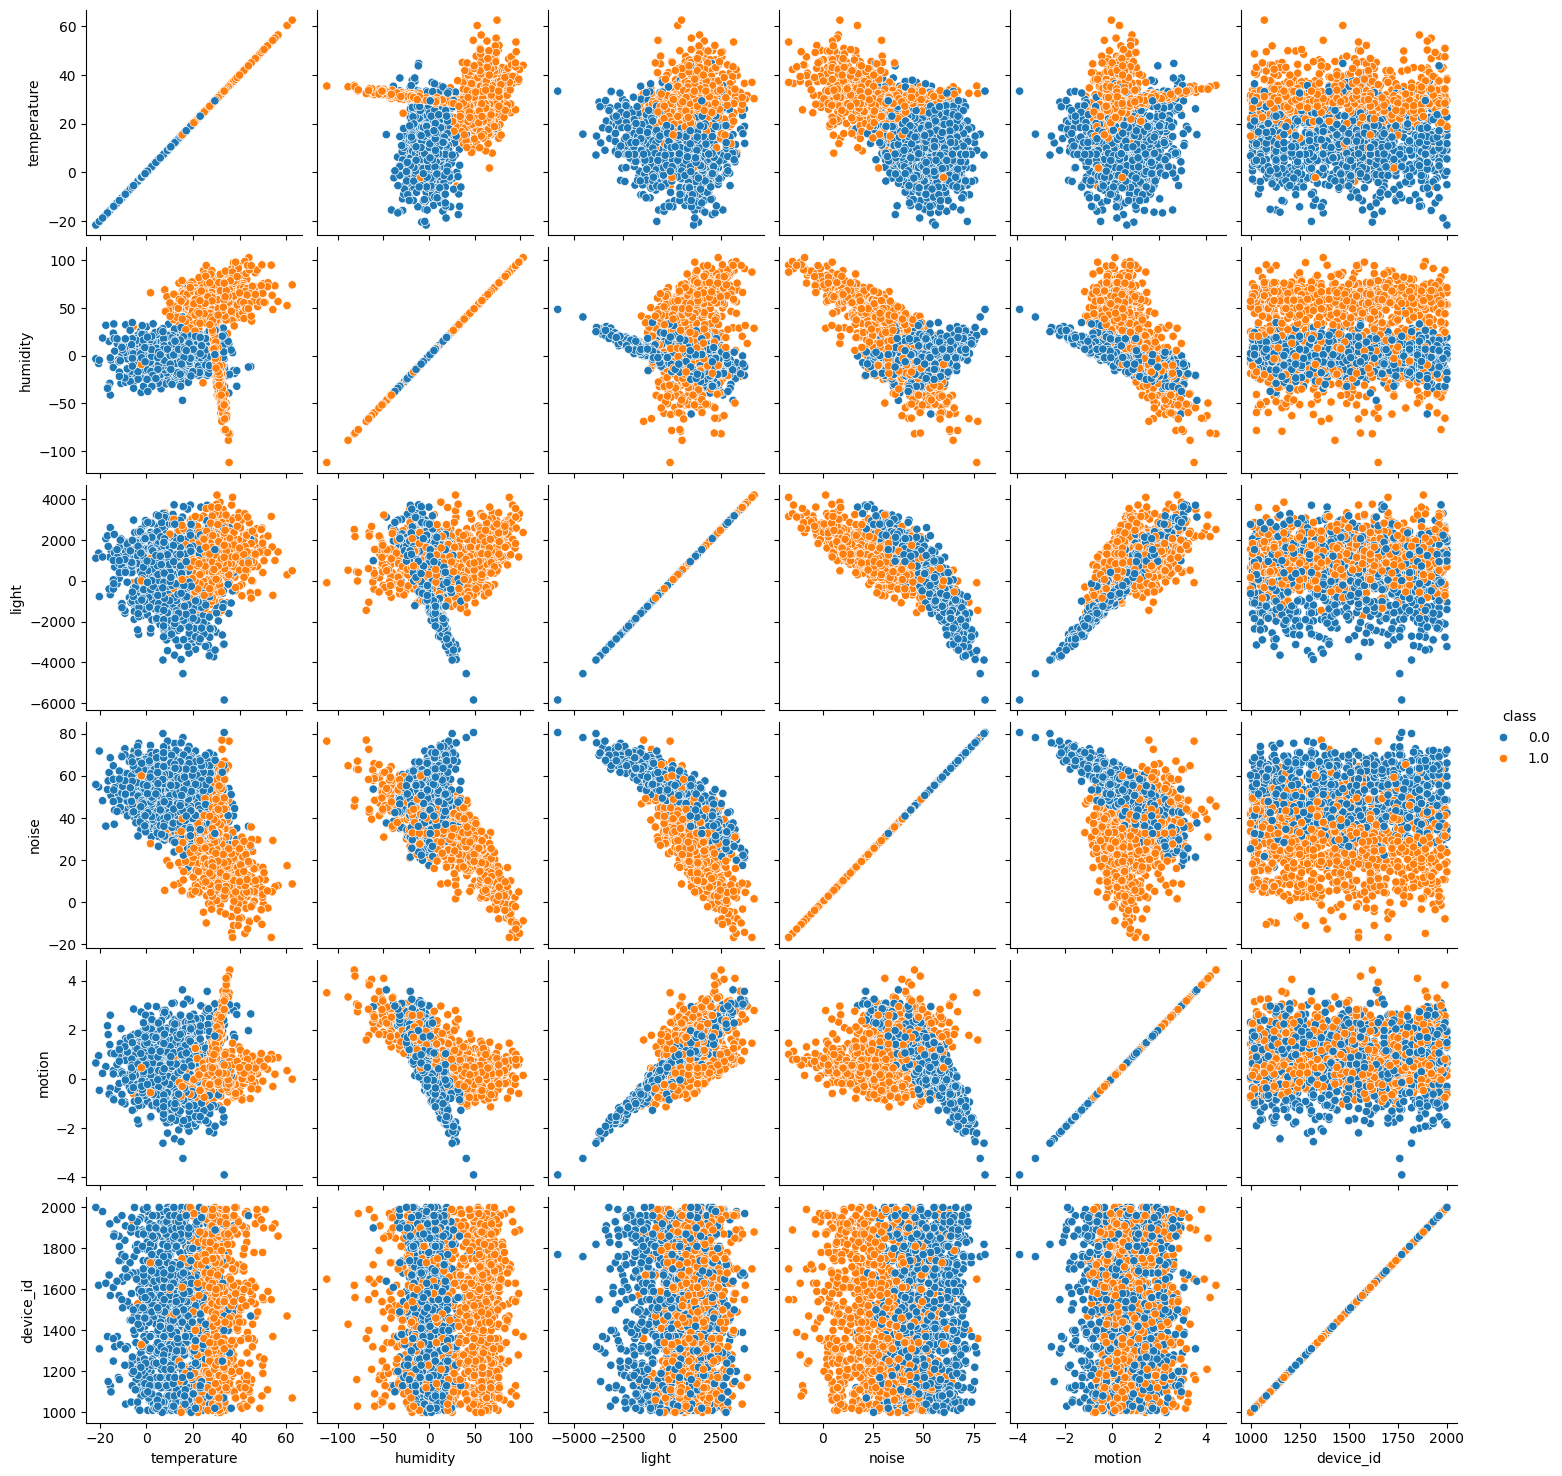

In [72]:
# Generating scatter plots of different features with scatter plots on the diagonal
sns.pairplot(
    df,
    vars=["temperature", "humidity", "light", "noise", "motion", "device_id"],
    hue="class",
    kind="scatter",
    diag_kind=None,
)
plt.show()

<div style="text-align: center; color:aquamarine">
  <h2>Splitting the Dataset</h2>
</div>

In [50]:
# Splitting the scaled dataframe into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

# Printing the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1599, 6)
X_test shape: (400, 6)
y_train shape: (1599,)
y_test shape: (400,)


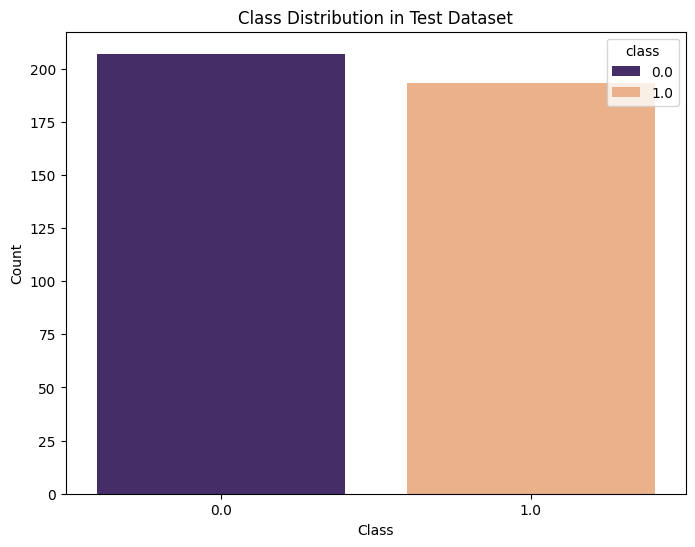

In [73]:
# Plot the class distribution in the test dataset
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette=["#432371", "#FAAE7B"], hue=y_test)
plt.title("Class Distribution in Test Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

<div style="text-align: center; color:aquamarine">
  <h2>Training & Testing Models</h2>
</div>

### 1. Logistic Regression

In [52]:
# Training and testing logistic regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Predict the test set results
y_pred = model_lr.predict(X_test)

# Printing the accuracy of the model
performance_report = classification_report(y_test, y_pred)
print(performance_report)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       207
         1.0       0.89      0.95      0.92       193

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



### Performance Analysis - Logistic Regression

The performance metrics for the **Logistic Regression Model** are summarized below:

**Logistic Regression Model**:
  - **Precision**: Measures the accuracy of the positive predictions. A precision of 0.95 for class 0.0 means that 95% of the instances predicted as class 0.0 are actually class 0.0.
  - **Recall**: Measures the ability of the model to find all the relevant cases within a dataset. A recall of 0.89 for class 0.0 means that 89% of the actual class 0.0 instances were correctly identified by the model.
  - **F1-Score**: The harmonic mean of precision and recall. It provides a single metric that balances both concerns. An F1-score of 0.92 for class 0.0 indicates a good balance between precision and recall.
  - **Support**: The number of actual occurrences of the class in the dataset. For class 0.0, the support is 207, meaning there are 207 instances of class 0.0 in the test set.
  - **Accuracy**: The overall accuracy of the model is 92%, indicating that 92% of the total predictions were correct.

### 2. K-Nearest Neighbors (KNN)

In [53]:
# Training and testing the KNN model
model_knn = KNeighborsClassifier()

# Training the model
model_knn.fit(X_train, y_train)

# Predicting the test set results
y_pred_knn = model_knn.predict(X_test)

# Print the performance metrics
performance_report_knn = classification_report(y_test, y_pred_knn)
print(performance_report_knn)

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       207
         1.0       0.93      0.96      0.95       193

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



### Performance Analysis - K-Nearest Neighbors (KNN)

The performance metrics for the **K-Nearest Neighbors (KNN) Model** are summarized below:

**K-Nearest Neighbors (KNN) Model**:
  - **Precision**: The precision for class 0.0 is 0.97, indicating a high accuracy of positive predictions for this class.
  - **Recall**: The recall for class 0.0 is 0.94, meaning the model correctly identified 94% of the actual class 0.0 instances.
  - **F1-Score**: The F1-score for class 0.0 is 0.95, showing a good balance between precision and recall.
  - **Support**: The support for class 0.0 is 207.
  - **Accuracy**: The overall accuracy of the KNN model is 95%, indicating a high level of correct predictions.

### 3. Support Vector Machine (SVM)

In [54]:
# Training and testing the SVM model
model_svm = SVC()

# Train the model
model_svm.fit(X_train, y_train)

# Predicting the test set results
y_pred_svm = model_svm.predict(X_test)

# Printing the performance metrics
performance_report_svm = classification_report(y_test, y_pred_svm)
print(performance_report_svm)

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       207
         1.0       0.94      0.99      0.96       193

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



### Performance Analysis - Support Vector Machine (SVM)

The performance metrics for the **Support Vector Machine (SVM) Model** are summarized below:

**Support Vector Machine (SVM) Model**:
  - **Precision**: The precision for class 0.0 is 0.99, indicating very high accuracy of positive predictions for this class.
  - **Recall**: The recall for class 0.0 is 0.94, meaning the model correctly identified 94% of the actual class 0.0 instances.
  - **F1-Score**: The F1-score for class 0.0 is 0.97, showing an excellent balance between precision and recall.
  - **Support**: The support for class 0.0 is 207.
  - **Accuracy**: The overall accuracy of the SVM model is 96%, indicating a very high level of correct predictions.

<div style="text-align: center; color: aquamarine">
  <h2>Discussion</h2>
</div>


All three models (Logistic Regression, KNN, and SVM) perform well, with the SVM model achieving the highest accuracy and F1-scores, indicating it is the most effective model for this dataset. The SVM model has a very high precision for class 0.0, which is important for this specific classification task. The SVM model also maintains a good balance between precision and recall, making it a robust choice for classification tasks.

### Reasons for Choosing SVM Over Other Models:

1. **High Accuracy**: The SVM model has demonstrated a higher overall accuracy (96%) compared to the Logistic Regression (92%) and K-Nearest Neighbors (95%) models. This indicates that the SVM model is more reliable in making correct predictions.

2. **Precision and Recall**: The SVM model has a very high precision (0.99) and a good recall (0.94) for class 0.0. This means that the model is not only accurate in its positive predictions but also effective in identifying all relevant instances. This balance is crucial in applications where both false positives and false negatives are costly.

3. **F1-Score**: The F1-score of 0.97 for class 0.0 indicates that the SVM model maintains a good balance between precision and recall, making it a robust choice for classification tasks.

4. **Handling High-Dimensional Data**: SVMs are particularly effective in high-dimensional spaces and are still effective when the number of dimensions exceeds the number of samples. This makes SVMs a good choice for datasets with many features.

5. **Versatility**: SVMs can be used for both linear and non-linear classification. By using different kernel functions (e.g., linear, polynomial, radial basis function), SVMs can model complex relationships in the data.

6. **Regularization**: SVMs include a regularization parameter, which helps to avoid overfitting. This is particularly useful when dealing with noisy data.

In summary, the SVM model's high accuracy, precision, recall, and versatility make it a strong candidate for classification tasks, especially when dealing with high-dimensional data and the need for a robust model that balances precision and recall.